In [1]:
#Imports
import json
import numpy as np
import pandas as pd
import csv
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
from peakutils import indexes

In [2]:
def jasonReader(path):
    """ Reads the .jason generated with jasonGenartor the given path"""
    with open(path,'r') as miarch:
        loaded_dict = json.loads(miarch.read())
    return loaded_dict

In [3]:
def slicesParser_tau(dictres):
    #extract all the slices data
    allSlices = dictres['slices']
    #seting columns names
    column_names = ['transient' + str(x+1) for x in range(0,len(allSlices[0]['tau_s']))]
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in range(0,len(allSlices)):
        df_sum.loc[i+1] = allSlices[i]['tau_s']

    return df_sum

In [7]:
def jasonReader(path):
    """ Reads the .jason generated with jasonGenartor the given path"""
    with open(path,'r') as miarch:
        loaded_dict = json.loads(miarch.read())
    return loaded_dict

In [20]:
def wholecellParser(dictres):
    #extract all the slices data
    allSlices = dictres['image']
    #seting columns names
    column_names = ['max_peaks_positions','max_peaks_intensities','min_peaks_positions','min_peaks_intensities','amplitudes','times_to_peaks','tau_s']
    #define a dataframe
    df_sum = pd.DataFrame(columns=column_names)
    #populating the dataframe
    for i in column_names:
        df_sum.loc[:,i] = allSlices[i][:2]

    return df_sum

In [30]:
tau_list = []
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/jsons/'
jsons_list = os.listdir(path)
for file in jsons_list:
    jason = jasonReader(path + file)
    wc_data = wholecellParser(jason)
    tau_data = wc_data['min_peaks_intensities']
    tau_list.append([file,tau_data.mean()])
tau_df = pd.DataFrame(tau_list,columns = ['file','basal'])
tau_df.to_csv('/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/whole_cell/basal_wc.csv', sep='\t',decimal=',')

In [92]:
DI_gradient_selected = pd.read_csv('/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/DI_gradient_selected.csv',index_col='Unnamed: 0')

In [159]:
tau_list = []
path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/jsons/'
jsons_list = os.listdir(path)
for file in jsons_list:
    for i in DI_gradient_selected.index:
        if str(file[:6]) in i:
            path_file = path + file
            dic = jasonReader(path_file)
            taus = wholecellParser(dic)['tau_s'][0]
            tau_list.append((file,taus))

In [213]:
DI_gradient = pd.read_csv('/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/DI_gradient.csv',index_col='Unnamed: 0')

In [160]:
taus_df = pd.DataFrame(set(tau_list),columns=['file','tau'])

In [214]:
for file in DI_gradient.index:
    if not taus_df[taus_df['file'].str.contains(file) == True].empty:
        DI_gradient.loc[file,'tau'] = taus_df[taus_df['file'].str.contains(file) == True].reset_index()['tau'][0]
    else:
        DI_gradient.loc[file,'tau'] = None

In [215]:
DI_gradient = DI_gradient.dropna()
DI_gradient = DI_gradient[DI_gradient['tau']>0]

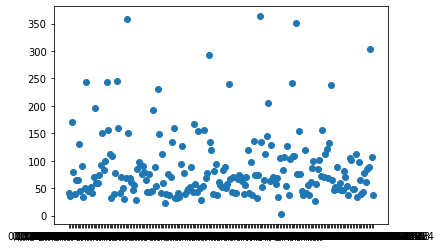

In [217]:
x= list(DI_gradient['1'])
y= list(DI_gradient['tau'])
plt.scatter(x,y)

plt.savefig('/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/analisis/DIgrad_vs_tau')

In [218]:
print(DI_gradient)

                                                       1                    2  \
311019_analysis_result_vk2b000.     0,054991225825834385  0,04969826116468117   
171019_analysis_result_c1c000.       0,07880791966603275  0,09323399062654668   
230819VK1_analysis_result_vk1c000.   0,27150860527563747  0,27117155573794205   
050320c7_analysis_result_7d001.      0,11962706150418316  0,14356428396070525   
240221_analysis_result_V2b000.       0,06175914815841569  0,07019806145780762   
...                                                  ...                  ...   
311019_analysis_result_vk4c000.      0,26139166523217156  0,21117857890146194   
071119vk5_analysis_result_vk5b000.   0,09709947880733441  0,10268610669974222   
200121_analysis_result_vk3d000.       0,2696122915852843  0,26171929168678104   
200121_analysis_result_d4c000.       0,11502701652884018  0,12257277889767969   
240221_analysis_result_C2b000.      0,044463470687717284   0,0408305332178973   

                           

{'N': 140.28018054265752, 'tau': 214.94389392143512}
[[Variables]]
    N:    10.0000000 (init = 10)
    tau:  1.00000000 (init = 1)


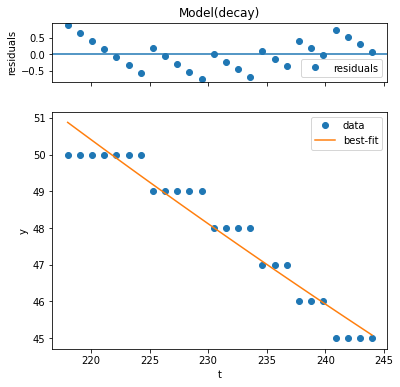

In [193]:
'''Fit tau manually'''


import numpy as np
from pandas import Series

from lmfit import Model, Parameter, report_fit

def decay(t, N, tau):
    return N*np.exp(-t/tau)

t = np.linspace(218, 244, num=26)
data = [50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 48, 48, 48, 48, 47, 47, 47, 46, 46, 46, 45, 45, 45, 45]

model = Model(decay, independent_vars=['t'])
result = model.fit(data, t=t, N=10, tau=150)
result.plot()
print(result.values)

result = model.fit(data, t=t,
                   N=Parameter('N', value=10),
                   tau=Parameter('tau', value=1))
report_fit(result.params)